## 3D PacMan Demo Code
The following demonstrates some of the functionality that is provided with the PacMan_Helper.py module.

### Import the PacMan_Helper module

Note: Place the "cloudColors.npy", "cloudPositions.npy", and "PacMan_Helper.py" and your Jupyter Notebook code in the same folder. This can be slow as it loads the whole 3D point cloud of the scene into the memory. 

In [1]:
# Required imports
# Give the module an alias of PacMan to make it less longwinded to use
from lib import PacMan_Helper_Accelerated as PacMan
import numpy
import matplotlib.pyplot as plt
import open3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


### Initialise the game state: Producing the pointcloud and the boolean indicator of spheres collected

In [2]:
# Intialise game
global_cloud, spheres_collected = PacMan.startup_scene()

# Print the data we have loaded
print("Pointcloud dictionary: ")
print(global_cloud)

print()

print("Spheres collected so far represented as a binary vector: ")
print(spheres_collected)

Pointcloud dictionary: 
{'Positions': array([[-5.24826622,  2.17943311, -5.98984051],
       [-5.14016819,  2.31065536, -6.00824881],
       [-5.12259817,  2.66443014, -5.99506664],
       ...,
       [-9.03449008,  2.0825    ,  4.55715628],
       [-9.03274526,  2.0825    ,  4.5571974 ],
       [-9.031     ,  2.0825    ,  4.55721111]]), 'Colors': array([[167., 147., 100.],
       [150., 138.,  82.],
       [155., 138.,  71.],
       ...,
       [255.,   0.,   0.],
       [255.,   0.,   0.],
       [255.,   0.,   0.]])}

Spheres collected so far represented as a binary vector: 
[False, False, False, False, False, False, False, False, False, False, False]


### Creating an image from a pointcloud by using `project_pointcloud_image`

Note: This can be slow, as it projects each point to the image plane and calculates it's overall contribution to the final pixel's value.

In [3]:
# Create current camera position and angle
position = numpy.zeros([3])
angle = numpy.zeros([3])

# Obtain image and associated maps
image, map1, map2, map3, map4 = PacMan.project_pointcloud_image(global_cloud, angle, position)

Text(0.5, 1.0, 'Map4 Image')

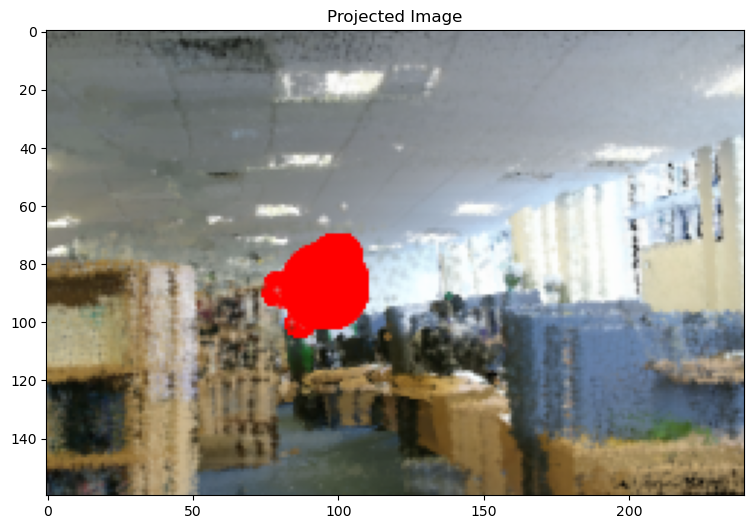

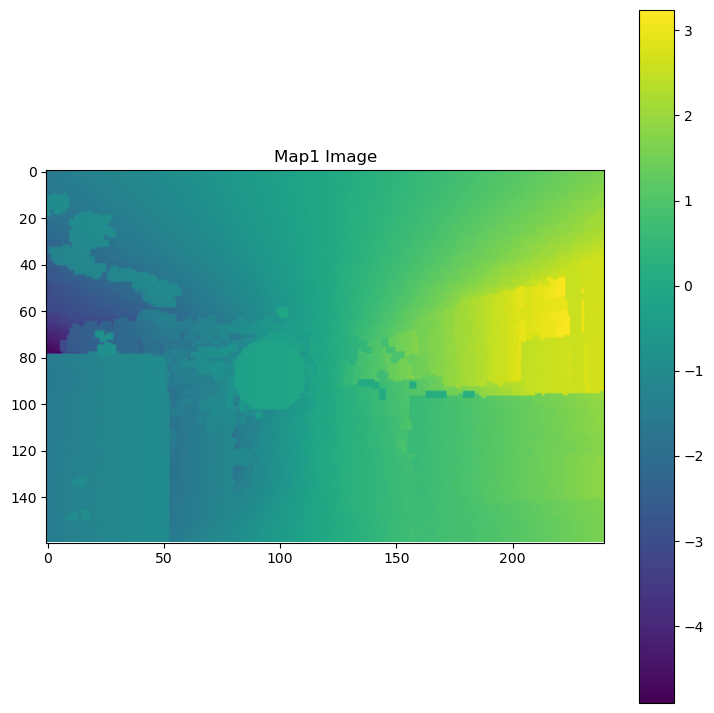

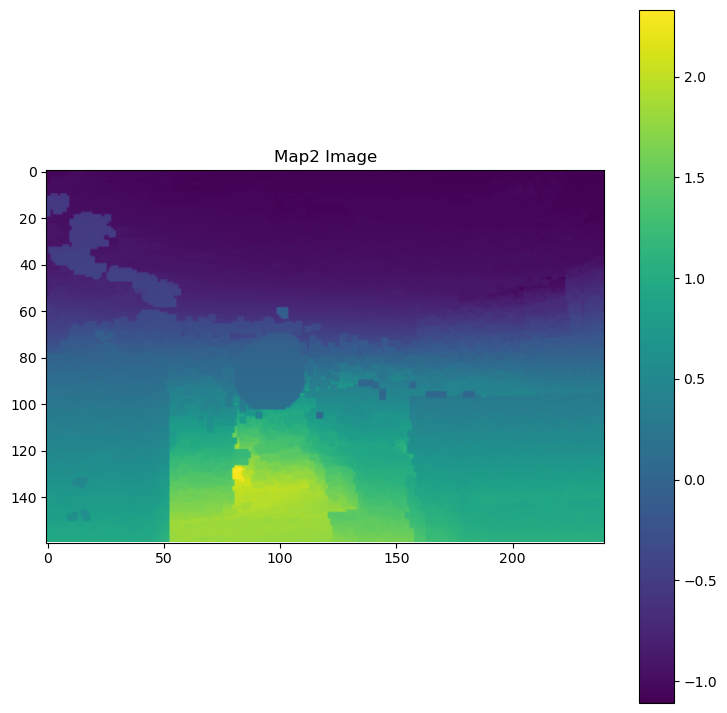

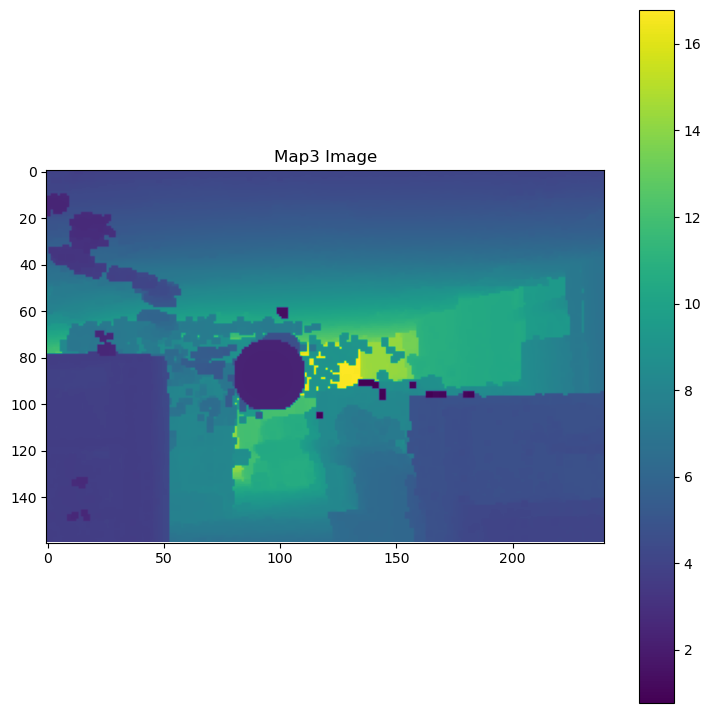

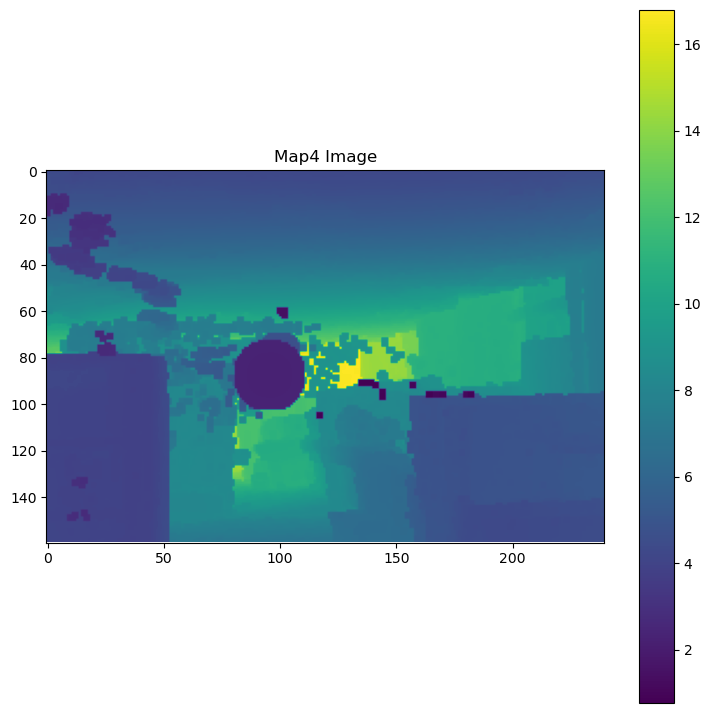

In [4]:
# Plot images using matplotlib.pyplot
plt.figure()
plt.imshow(image)
plt.title('Projected Image')

plt.figure()
plt.imshow(map1)
plt.colorbar()
plt.title('Map1 Image')

plt.figure()
plt.imshow(map2)
plt.colorbar()
plt.title('Map2 Image')

plt.figure()
plt.imshow(map3)
plt.colorbar()
plt.title('Map3 Image')

plt.figure()
plt.imshow(map4)
plt.colorbar()
plt.title('Map4 Image')

### Updating the scene
Here I will cheat and move the camera to somewhere I know a sphere is, just to show the functionality.

In [5]:
# Initialise game
position = numpy.asarray([0, 0, 0])
print('I am at position [{0}, {1}, {2}]'.format(*position))
print('I have found {0} out of {1} spheres!\n'.format(numpy.sum(spheres_collected), len(spheres_collected)));

# Move position and update scene, this results in a sphere being 'captured'
position = numpy.asarray([-0.18, 0.08, 2.31])
print('I am now at position [{0}, {1}, {2}]'.format(*position))
global_cloud, spheres_collected = PacMan.update_scene(position, spheres_collected);
print('I have found {0} out of {1} spheres!\n'.format(numpy.sum(spheres_collected), len(spheres_collected)));

I am at position [0, 0, 0]
I have found 0 out of 11 spheres!

I am now at position [-0.18, 0.08, 2.31]
I have found 1 out of 11 spheres!



### Visualizing the pointcloud
We can use matplotlib's scatter or the pptk module. pptk has a lot of optimization so is more responsive to use. no visualization is really needed, but can help.

In [6]:
%matplotlib notebook


# Intialise game
global_cloud, spheres_collected = PacMan.startup_scene()

pcd = open3d.geometry.PointCloud(open3d.utility.Vector3dVector(global_cloud['Positions']))
pcd.colors = open3d.utility.Vector3dVector(global_cloud['Colors']/255)

open3d.visualization.draw_geometries([pcd])